In [1]:
import math, sys, os, torch, torchvision
import numpy as np

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Using gpu: %s ' % torch.cuda.is_available())

print("CUDA version:", torch.version.cuda)



Using gpu: True 
CUDA version: 11.8


Feature batch shape: torch.Size([32, 3, 284, 284])
Labels batch shape: torch.Size([32])


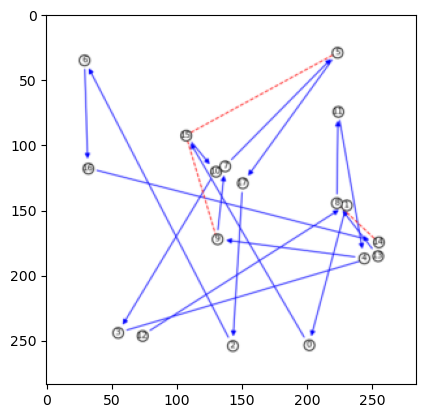

Label: 0


In [ ]:
# load model
from models.VisualScoringModel import VisualScoringModel
import src.config as cfg
from torchvision import datasets, transforms
from torch.utils.data import random_split, DataLoader
from src.data_loader import load_data

image_size = cfg.image_size
batch_size = cfg.batch_size
train_ratio = cfg.train_ratio

transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
])

data_path = cfg.DATA_DIR

input_shape = (3, image_size[0], image_size[1])

model = VisualScoringModel(input_shape=input_shape).to(device)

train_loader, test_loader = load_data(
    data_path=data_path,
    batch_size=batch_size,
    transform=transform,
    train_ratio=train_ratio,
    image_size=image_size,
)

# --- Check DataLoader ---
train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]

img = img.permute(1, 2, 0).cpu().numpy()

import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()
print(f"Label: {label}")


In [17]:
from models.VisualScoringModel import train_model
train_model(
    model,
    train_loader,
    test_loader,
    num_epochs=10,
    device=device,
    learning_rate=1e-3,
)


Epoch 1/10 [Train]: 100%|██████████| 2/2 [00:00<00:00,  3.85it/s]


Epoch 1: Train Loss = 18.3527, Train Acc = 83.33%
           Test Loss  = 13.6127, Test Acc  = 58.33%



Epoch 2/10 [Train]: 100%|██████████| 2/2 [00:00<00:00,  5.15it/s]


Epoch 2: Train Loss = 10.2012, Train Acc = 47.92%
           Test Loss  = 25.0850, Test Acc  = 41.67%



Epoch 3/10 [Train]: 100%|██████████| 2/2 [00:00<00:00,  4.62it/s]


Epoch 3: Train Loss = 14.5212, Train Acc = 52.08%
           Test Loss  = 2.8444, Test Acc  = 41.67%



Epoch 4/10 [Train]: 100%|██████████| 2/2 [00:00<00:00,  4.00it/s]


Epoch 4: Train Loss = 1.6577, Train Acc = 47.92%
           Test Loss  = 1.2699, Test Acc  = 58.33%



Epoch 5/10 [Train]: 100%|██████████| 2/2 [00:00<00:00,  4.41it/s]


Epoch 5: Train Loss = 1.3900, Train Acc = 47.92%
           Test Loss  = 0.9805, Test Acc  = 58.33%



Epoch 6/10 [Train]: 100%|██████████| 2/2 [00:00<00:00,  4.28it/s]


Epoch 6: Train Loss = 0.9596, Train Acc = 47.92%
           Test Loss  = 0.6996, Test Acc  = 58.33%



Epoch 7/10 [Train]: 100%|██████████| 2/2 [00:00<00:00,  5.00it/s]


Epoch 7: Train Loss = 0.6460, Train Acc = 64.58%
           Test Loss  = 0.7437, Test Acc  = 41.67%



Epoch 8/10 [Train]: 100%|██████████| 2/2 [00:00<00:00,  4.13it/s]


Epoch 8: Train Loss = 0.5996, Train Acc = 56.25%
           Test Loss  = 0.8457, Test Acc  = 41.67%



Epoch 9/10 [Train]: 100%|██████████| 2/2 [00:00<00:00,  4.37it/s]


Epoch 9: Train Loss = 0.6394, Train Acc = 52.08%
           Test Loss  = 0.7705, Test Acc  = 41.67%



Epoch 10/10 [Train]: 100%|██████████| 2/2 [00:00<00:00,  4.71it/s]


Epoch 10: Train Loss = 0.5942, Train Acc = 58.33%
           Test Loss  = 0.7140, Test Acc  = 58.33%



'data/vrp_images'